In [48]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# splitting the Test and Train Data

In [49]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Data Preprocessing

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [51]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [52]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [53]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [54]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [55]:
def plot_image(x, y, index):
    plt.figure(figsize= (15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

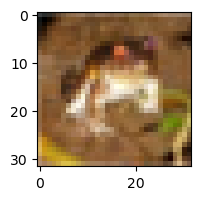

In [56]:
plot_image(x_train, y_train, 0)

In [57]:
x_train, x_test = x_train/255, x_test/255

In [58]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# Convolutional Neural Network

In [59]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3, 3), padding='same', activation= 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), padding='same',  activation = 'relu'),
    layers. MaxPooling2D(2, 2),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), padding='same',  activation = 'relu'),
    layers. MaxPooling2D(2, 2),
    
    layers.Conv2D(filters = 256, kernel_size = (3, 3), padding='same',  activation = 'relu'),
    layers. MaxPooling2D(2, 2),
    
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(10, activation= 'softmax')
    
])

C:\Users\Ahtisham Ali\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
cnn.compile(optimizer= 'adam',
           loss='sparse_categorical_crossentropy',
           metrics= ['accuracy'])

In [61]:
cnn.fit(x_train, y_train, epochs= 20)

test_loss, test_acc = cnn.evaluate(x_train, y_train)
print('Test accuracy:', test_acc * 100)
print("Loss is:", train_loss * 100)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.3430 - loss: 1.7568
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6084 - loss: 1.1080
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6858 - loss: 0.8870
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7330 - loss: 0.7617
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7659 - loss: 0.6633
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7901 - loss: 0.5971
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8106 - loss: 0.5396
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.8301 - loss: 0.4840
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.8482 - loss: 0.4340
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8609 - loss: 0.3919
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8729 - loss: 0.3608
Epoch 12

# Training Accuracy and Loss

In [62]:
train_loss, train_acc = cnn.evaluate(x_train, y_train)
print(train_acc * 100)
print(train_loss * 100)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9678 - loss: 0.1006
96.71000242233276
10.142940282821655


# Testing Accuracy and Loss

In [63]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print('Test accuracy:', test_acc * 100)
print('Test Loss', test_loss * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7620 - loss: 0.9634
Test accuracy: 75.95000267028809
Test Loss 96.49840593338013


In [64]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [65]:
y_test = y_test.reshape(-1,)

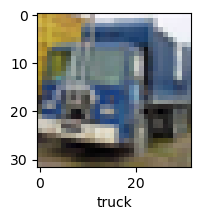

In [66]:
plot_image(x_test, y_test, 14)

In [67]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[6.92869362e-04, 1.07861613e-03, 3.23793647e-05, 7.54799008e-01,
        4.14961687e-06, 2.33307049e-01, 5.40916750e-04, 2.10018879e-05,
        9.47790034e-03, 4.61759373e-05],
       [1.08530825e-04, 4.51279581e-02, 3.47030067e-08, 8.47801662e-10,
        1.23719683e-08, 7.55917759e-11, 3.06654968e-09, 6.12492175e-12,
        9.54135537e-01, 6.27932139e-04],
       [1.05605848e-01, 2.09164709e-01, 2.99238363e-05, 2.92272525e-05,
        6.68930079e-06, 2.01404603e-07, 5.03984950e-07, 5.60223998e-04,
        2.16369271e-01, 4.68233377e-01],
       [6.13717914e-01, 1.05643284e-03, 3.99532728e-04, 3.54256743e-04,
        8.88154318e-06, 1.01358850e-07, 2.46859017e-05, 3.18696380e-07,
        3.84314626e-01, 1.23228732e-04],
       [2.95058248e-06, 2.87711600e-06, 2.28095218e-03, 1.20496266e-02,
        6.48639584e-03, 6.02156433e-06, 9.79168713e-01, 1.41308590e-07,
        4.44770478e-07, 1.79317215e-06]], dtype=float32)

In [68]:
np.argmax(y_pred[1])

8

In [69]:
y_class = [np.argmax(element) for element in y_pred]

In [70]:
y_class[:5]

[3, 8, 9, 0, 6]

In [71]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)